In [57]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sn
import pandas as pd
import copy

In [89]:
with open("../data/agreement_results.16.layer=3.only_attractors=False.only_not_attractors=True.pickle", "rb") as f:
    data = pickle.load(f)

In [90]:
data.keys()

dict_keys(['obj_rel_across_anim.pickle', 'obj_rel_no_comp_across_inanim.pickle', 'obj_rel_no_comp_across_anim.pickle', 'subj_rel.pickle', 'obj_rel_across_inanim.pickle', 'simple_agrmt.pickle', 'sent_comp.pickle'])

In [91]:
len(data.keys())

7

In [92]:
relevant = [k for k in data.keys() if "within" not in k]

In [93]:
relevant, len(relevant)

(['obj_rel_across_anim.pickle',
  'obj_rel_no_comp_across_inanim.pickle',
  'obj_rel_no_comp_across_anim.pickle',
  'subj_rel.pickle',
  'obj_rel_across_inanim.pickle',
  'simple_agrmt.pickle',
  'sent_comp.pickle'],
 7)

In [94]:
for k in copy.deepcopy(data):
    if k not in relevant:
        del data[k]

In [95]:
data.keys()

dict_keys(['obj_rel_across_anim.pickle', 'obj_rel_no_comp_across_inanim.pickle', 'obj_rel_no_comp_across_anim.pickle', 'subj_rel.pickle', 'obj_rel_across_inanim.pickle', 'simple_agrmt.pickle', 'sent_comp.pickle'])

In [96]:
sims = np.zeros((len(data.keys()), 6))
print(sims.shape)
agrt_types = ["obj_rel_across_anim", "obj_rel_across_inanim", "obj_rel_no_comp_across_anim", "obj_rel_no_comp_across_inanim", "subj_rel", "sent_comp", "simple_agrmt"]
print("test", len(agrt_types), len(data.keys()))
#agrt_type2ind = {d:i for i,d in enumerate(data.keys())}
agrt_type2ind = {d+".pickle":i for i,d in enumerate(agrt_types)}
agrt_ind2type = {i:d for d,i in agrt_type2ind.items()}

rc_type2ind = {d:i for i,d in enumerate(data["obj_rel_across_anim.pickle"].keys())}
rc_ind2type = {i:d for d,i in rc_type2ind.items()}

print(len(rc_ind2type), len(agrt_type2ind))
print(rc_ind2type)
print(agrt_ind2type)

(7, 6)
test 7 7
6 7
{0: 'src', 1: 'orc', 2: 'orrc', 3: 'prc', 4: 'prrc', 5: 'all'}
{0: 'obj_rel_across_anim.pickle', 1: 'obj_rel_across_inanim.pickle', 2: 'obj_rel_no_comp_across_anim.pickle', 3: 'obj_rel_no_comp_across_inanim.pickle', 4: 'subj_rel.pickle', 5: 'sent_comp.pickle', 6: 'simple_agrmt.pickle'}


In [97]:
for k in data.keys():
    print(k)

obj_rel_across_anim.pickle
obj_rel_no_comp_across_inanim.pickle
obj_rel_no_comp_across_anim.pickle
subj_rel.pickle
obj_rel_across_inanim.pickle
simple_agrmt.pickle
sent_comp.pickle


In [98]:
for agreement_type in data.keys():
    for rc_type in data[agreement_type].keys():
        before = data[agreement_type][rc_type]["acc_before"]
        after = data[agreement_type][rc_type]["acc_after"]
        sims[agrt_type2ind[agreement_type], rc_type2ind[rc_type]] = str(((before-after)/before) * 100)

In [84]:
labels_rows = [agrt_ind2type[i].split(".")[0] for i in range(len(agrt_ind2type))]
labels_columns = [rc_ind2type[i] for i in range(len(rc_ind2type))]

print(labels_rows)
print(labels_columns)

['obj_rel_across_anim', 'obj_rel_across_inanim', 'obj_rel_no_comp_across_anim', 'obj_rel_no_comp_across_inanim', 'subj_rel', 'sent_comp', 'simple_agrmt']
['src', 'orc', 'orrc', 'prc', 'prrc', 'all']


In [85]:
def plot(labels_rows, labels_columns, results, layer, classifier,iters):

    df_cm = pd.DataFrame(results, index = labels_rows,
                  columns = labels_columns)
    print(df_cm)
    fig = plt.figure(figsize = (10,10))
    ax = sn.heatmap(df_cm, annot=True, vmin = 0, vmax=100)
    #fig.set_size_inches(17, 4)
    plt.title("agreement accuracy drop (%) (rows) as a function of INLP-RC-type (columns). Layer: {}. classifier: {}. {}\n (Larger values indicate greater influence of INLP)".format(layer, classifier, iters))
    #plt.show()
    ax.figure.axes[-1].yaxis.label.set_size(50)
    plt.savefig("../results/plots/agreement-interaction:{}.classifier:{}.{}.only-attractors.png".format(layer, classifier, iters), dpi=800)    
    plt.show()

                                     src        orc       orrc        prc  \
obj_rel_across_anim            76.603666  90.301961  72.244560  92.622341   
obj_rel_across_inanim          17.427386  19.246862  11.618257  26.970954   
obj_rel_no_comp_across_anim    74.193548  91.735823  96.761956  78.068248   
obj_rel_no_comp_across_inanim  36.099585  48.085106  24.796748  35.983264   
subj_rel                       68.260870  84.955752  69.747899  74.122807   
sent_comp                       2.416194   4.432389   2.819433   1.609717   
simple_agrmt                    0.000000   0.833333   0.000000   0.000000   

                                    prrc        all  
obj_rel_across_anim            80.982383  84.020619  
obj_rel_across_inanim           4.132231  16.597510  
obj_rel_no_comp_across_anim    89.090909  88.224677  
obj_rel_no_comp_across_inanim  38.589212  35.537190  
subj_rel                       76.150628  85.775862  
sent_comp                       3.222672   4.817742  
simpl

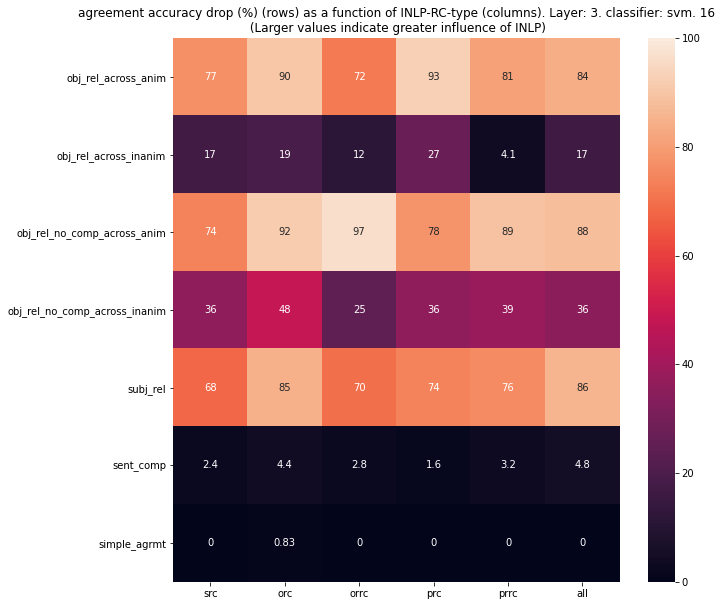

In [87]:
plot(labels_rows, labels_columns, sims, "3", "svm", "16")

                                     src        orc       orrc        prc  \
obj_rel_across_anim            11.600000   9.200000  13.600000  20.000000   
obj_rel_across_inanim           0.000000   0.000000   0.000000   0.000000   
obj_rel_no_comp_across_anim    18.400000  29.312653  32.248230  22.885246   
obj_rel_no_comp_across_inanim   9.600000  12.000000   6.400000   4.000000   
subj_rel                        1.200000   2.400000   3.212851   5.600000   
sent_comp                       2.416194   4.432389   2.819433   1.609717   
simple_agrmt                    0.000000   0.833333   0.000000   0.000000   

                                    prrc        all  
obj_rel_across_anim            12.800000  16.800000  
obj_rel_across_inanim           0.000000   0.000000  
obj_rel_no_comp_across_anim    26.315789  26.718236  
obj_rel_no_comp_across_inanim   2.800000   2.800000  
subj_rel                        4.000000   8.400000  
sent_comp                       3.222672   4.817742  
simpl

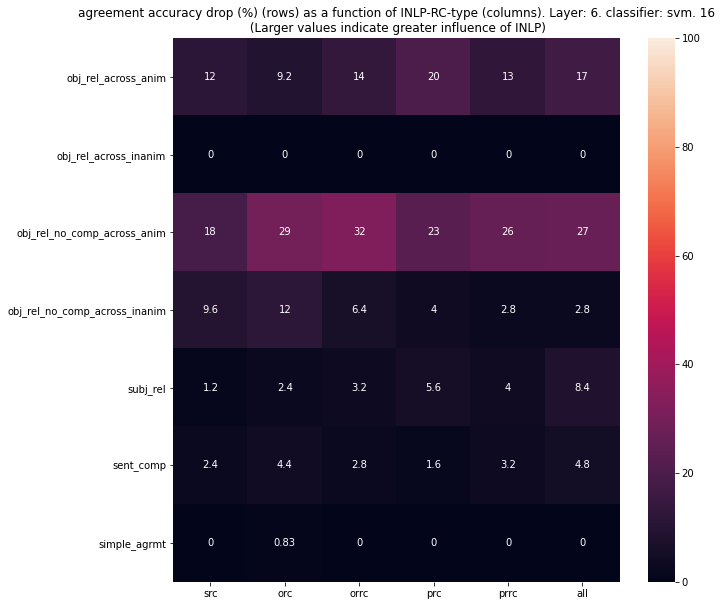

In [73]:
plot(labels_rows, labels_columns, sims, "6", "svm", "16")